In [14]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(6)
import math

[[  1.           7.06271257  -4.43060687]
 [  1.           6.64502272  -2.53437729]
 [  1.          -1.13599245  -7.83714475]
 [  1.           4.0780129   -4.87353096]
 [  1.          -1.81854779  -9.21307877]
 [  1.          -2.04526856 -10.16766281]
 [  1.           4.27858296  -3.64223077]
 [  1.          -0.29558021  -9.20405811]
 [  1.           5.22077265  -6.28680586]
 [  1.          -1.83727003  -8.25157645]
 [  1.           7.4584847   -5.30050985]
 [  1.           4.93150507  -3.43064093]
 [  1.          -1.7694279   -9.32767997]
 [  1.           5.25191657  -5.48859954]
 [  1.           6.60704632  -4.45212519]
 [  1.           7.98344444  -4.78049858]
 [  1.           6.30257159  -5.27091977]
 [  1.           5.80498764  -5.10233062]
 [  1.           5.67842499  -3.38317043]
 [  1.           7.14022514  -5.95662772]
 [  1.          -3.18329394  -8.68350703]
 [  1.          -1.25797779  -8.00743496]
 [  1.          -3.22549935  -7.52127041]
 [  1.          -1.81453265  -7.62

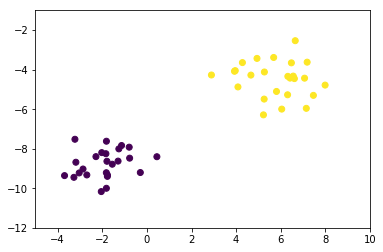

In [15]:
from sklearn.datasets.samples_generator import make_blobs

(X,y) =  make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1,random_state=40)
#adding 1 to X - bias
X1 = np.c_[np.ones((X.shape[0])),X]
print(X1)
plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
plt.axis([-5,10,-12,-1])
plt.show()

In [16]:
pos=[]
neg=[]
for i,v in enumerate(y):
    if v==0:
        neg.append(X[i])
    else:
        pos.append(X[i])

#creating our data dictionary for features
data_dict = {-1:np.array(neg), 1:np.array(pos)}

In [17]:
#weights
w=[]
#biases
b=[]

feature_max=float('-inf')
feature_min=float('+inf')
        
#finding max and min feature values
for yi in data_dict:
    if np.amax(data_dict[yi])>feature_max:
        feature_max=np.amax(data_dict[yi])
                
    if np.amin(data_dict[yi])<feature_min:
        feature_min=np.amin(data_dict[yi])

#the learning rate
learning_rate = [feature_max * 0.1, feature_max * 0.01, feature_max * 0.001,]

In [18]:
def SVM_Training(data_dict):
    i=1
    global w
    global b
    length_Wvector = {}
    transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
    
    step_size = 2
    multiple = 5
    optimum_weight = feature_max*0.5

    for l in learning_rate:
        
        w = np.array([optimum_weight,optimum_weight])     
        optimized = False
        while not optimized:
            #maximize b values, check for every b, b from -max to max
            for b in np.arange(-1*(feature_max*step_size), feature_max*step_size, l*multiple):
                for transformation in transforms:
                    w_t = w*transformation
                    
                    correctly_classified = True
                    
                    # every data point is correct
                    for yi in data_dict:
                        for xi in data_dict[yi]:
                            if yi*(np.dot(w_t,xi)+b) < 1:
                                correctly_classified = False
                                
                    if correctly_classified:
                        length_Wvector[np.linalg.norm(w_t)] = [w_t,b]
            
            if w[0] < 0:
                optimized = True
            else:
                w = w - l

        norms = sorted([n for n in length_Wvector])
        
        minimum_wlength = length_Wvector[norms[0]]
        w = minimum_wlength[0]
        b = minimum_wlength[1]
        
        optimum_weight = w[0]+l*2

In [19]:
SVM_Training(data_dict)

In [20]:
colors = {1:'r',-1:'b'}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [21]:
def visualization(data_dict):
        
        plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)

        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (feature_min*0.9,feature_min*1.)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # positive support vector hyperplane
        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # negative support vector hyperplane
        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # positive support vector hyperplane
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        plt.axis([-5,10,-12,-1])
        plt.show()

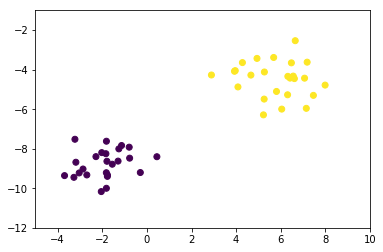

In [22]:
visualization(data_dict)

In [23]:
def predict(features):
        dot_result = np.sign(np.dot(np.array(features),w)+b)
        return dot_result.astype(int)
    
for i in X[:5]:
    print(predict(i),end=',  ')

1,  1,  -1,  1,  -1,  

In [24]:
l=[]
for i in X:
    
    l.append(predict(i[:6]))
l=np.array(l).astype(int)
l

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1])

In [25]:
X[4]

array([-1.81854779, -9.21307877])

In [26]:
for i, j in enumerate(y):
    if j==0:
        y[i]=-1
y

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1])

In [27]:
error = sum((l-y)**2)
error

0

0